LINK TO DATASET : `https://www.kaggle.com/datasets/hakabuk/gun-deaths-in-the-us?datasetId=714&sortBy=voteCount&select=guns.csv`

# Bài thi giữa kì môn Khoa học dữ liệu

## Bộ dữ liệu sử dụng : Gun Deaths in the US: 2012-2014

In [2]:
#import thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import random
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
import datetime
import warnings
warnings.filterwarnings('ignore')

### `Câu 1 : Cài đặt phương pháp Boostrap`

### Đọc dữ liệu từ dataset

In [3]:
#xuất ra bảng dữ liệu
data = 'guns.csv'
guns = pd.read_csv(data, index_col=0)
guns.dropna(inplace=True)
guns.columns = map(str.capitalize, guns.columns)
guns

,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0
...,...,...,...,...,...,...,...,...,...,...
100794,2014,12,Homicide,0,M,36.0,Black,100,Home,2.0
100795,2014,12,Homicide,0,M,19.0,Black,100,Street,2.0
100796,2014,12,Homicide,0,M,20.0,Black,100,Street,2.0
100797,2014,12,Homicide,0,M,22.0,Hispanic,260,Street,1.0


### Đọc dữ liệu từ cột Age

In [4]:
#đọc dữ liệu từ cột age
saved_column = guns.Age
saved_column

1         34.0
2         21.0
3         60.0
4         64.0
5         31.0
          ... 
100794    36.0
100795    19.0
100796    20.0
100797    22.0
100798    43.0
Name: Age, Length: 99343, dtype: float64

### Hàm Boostrap

In [5]:
#n kích thước mẫu n, M số lần lấy mẫu, x confident level
def Bootstraping(n, M, x):
  #lấy số lượng mẫu boostrap và tính mean 
  boostrap_sample = []
  boostrap_statistic = []

  for i in range(M):
    tmp = random.sample(saved_column.tolist(), n)
    boostrap_sample.append(tmp)
    boostrap_statistic.append(np.mean(tmp))

  boostrap_statistic.sort()

  # print("Tổng số mẫu: ",len(boostrap_sample),"mẫu")

  # Mức ý nghĩa
  a = (1-x/100)/2

  #cận dưới và cận trên
  lower_bound = boostrap_statistic[int(len(boostrap_sample)*a)]
  uppder_bound = boostrap_statistic[int(len(boostrap_sample)*(1-a))]
  print("Cận dưới: ",lower_bound,"tuổi")
  print("Cận trên", uppder_bound,"tuổi")

  #Vẽ phân bố lấy mẫu bằng histogram
  sns.set(rc={"figure.figsize":(25, 8)})
  ax = sns.histplot(data=boostrap_statistic,kde=True,stat="probability")
  plt.title('Sampling Distribution',fontsize=16,weight='bold')
  plt.xlabel('Mean Boostrap',fontsize=14)
  plt.ylabel('Probability',fontsize=14)
  plt.axvline(lower_bound, color= 'g')
  plt.axvline(uppder_bound, color= 'g')

### Vẽ biểu đồ

Cận dưới:  41.08 tuổi
Cận trên 47.19 tuổi


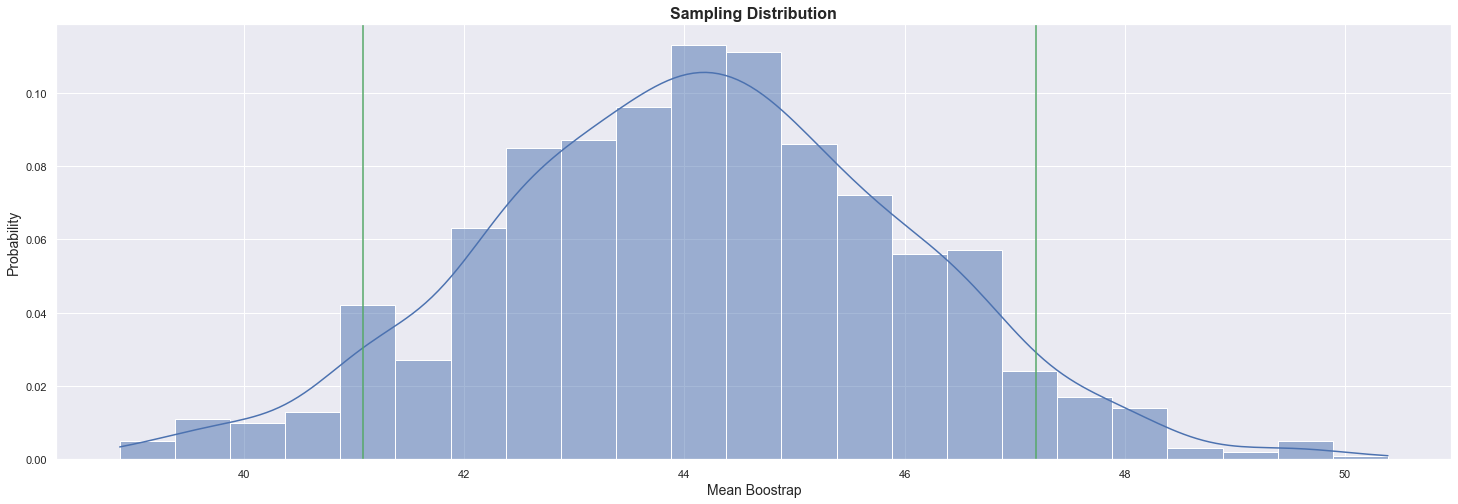

In [6]:
#Vẽ biểu đồ Histogram thể hiện phân bố lấy mẫu
Bootstraping(100,1000,90)

### `Câu 2 : Thống kê các mô tả quan trọng của các biến`

### Làm sạch dữ liệu

In [7]:
#Những người dưới 16 tuổi có trình độ học vấn bằng 5.0 và rỗng thì thay thế bằng 1.0
index_temp = guns[(guns['Age'] < 16) & ((guns['Education'].isnull()) | (guns['Education'] == 5.0))].index
guns.loc[index_temp, 'Education'] = 1.0

guns.Education.value_counts()

2.0    42258
1.0    21483
3.0    21430
4.0    12879
5.0     1293
Name: Education, dtype: int64

In [8]:
#Những người dưới 5 tuổi thì trình độ học vấn bằng 0.0
index_temp = guns[(guns['Age'] < 5)].index
guns.loc[index_temp, 'Education'] = 0.0
guns = guns[guns.Education != 5.0]
guns.Education.value_counts()

2.0    42258
3.0    21430
1.0    21273
4.0    12879
0.0      210
Name: Education, dtype: int64

Giải thích trình độ học vấn : 

0.0 : Dưới tiểu học

1.0 : Dưới trung học cơ sở

2.0 : Trung học phổ thông

3.0 : Đại học

4.0 : Tốt nghiệp Đại học

In [9]:
#Loại bỏ Intent là Undetermined
guns = guns[guns.Intent != 'Undetermined']
guns.Intent.value_counts()

Suicide       62295
Homicide      33350
Accidental     1607
Name: Intent, dtype: int64

In [10]:
#Lấy ra những người có Intent là Suicide và Intent là Homicide
suicide = guns[guns['Intent'] == 'Suicide']
homicide = guns[guns['Intent'] == 'Homicide']
#suicide.head()

### Thống kê

`Biểu đồ thể hiện xu hướng tử vong dựa trên trình độ học vấn`

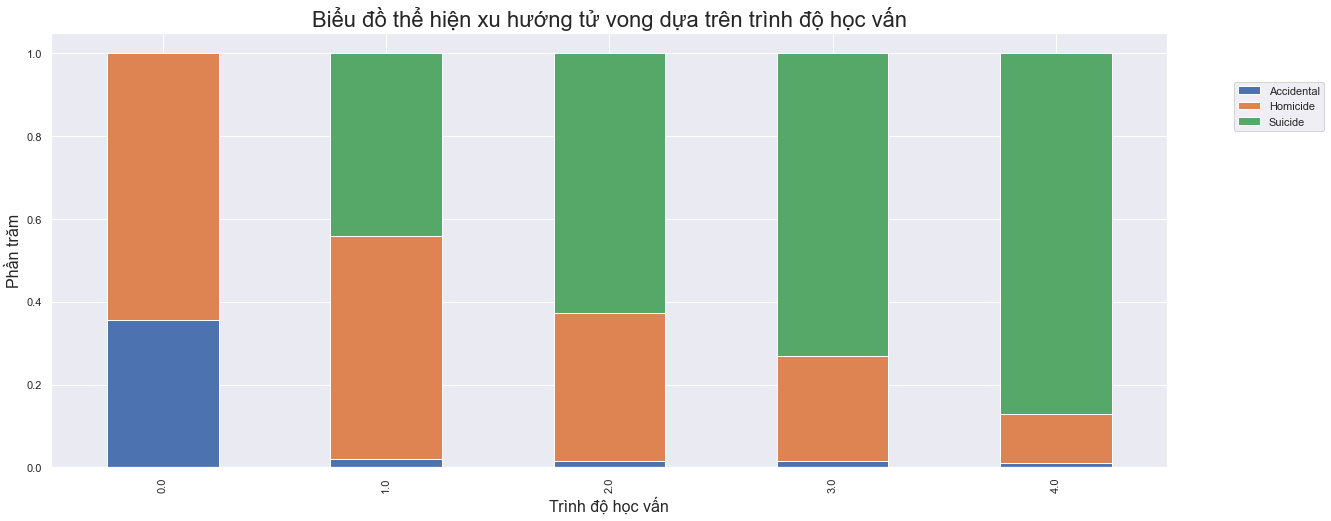

In [11]:
#Biểu đồ thể hiện xu hướng tử vong dựa trên trình độ học vấn
sns.set(rc={"figure.figsize":(20, 8)})

education = pd.crosstab(guns.Education, guns.Intent)
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Biểu đồ thể hiện xu hướng tử vong dựa trên trình độ học vấn', fontsize=22)
plt.xlabel('Trình độ học vấn', fontsize=16)
plt.ylabel('Phần trăm', fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(1.1,0.9))

Nhận xét : 
```
{
1 Lượng lớn người với trình độ học vấn là 3.0 hoặc 4.0 thì tự tử nhiều hơn là giết người. 3/4 các ca là tự sát, trong khi đó chỉ có 1/4 ca là giết người. Trình độ học vấn có thể dùng để dự đoán hành vi.
}
```

`Biểu đồ thể hiện độ tuổi tự sát và giết người được so sánh theo trình độ học vấn`

Text(0.5, 0.98, 'Độ tuổi giết người: So sánh theo trình độ học vấn')

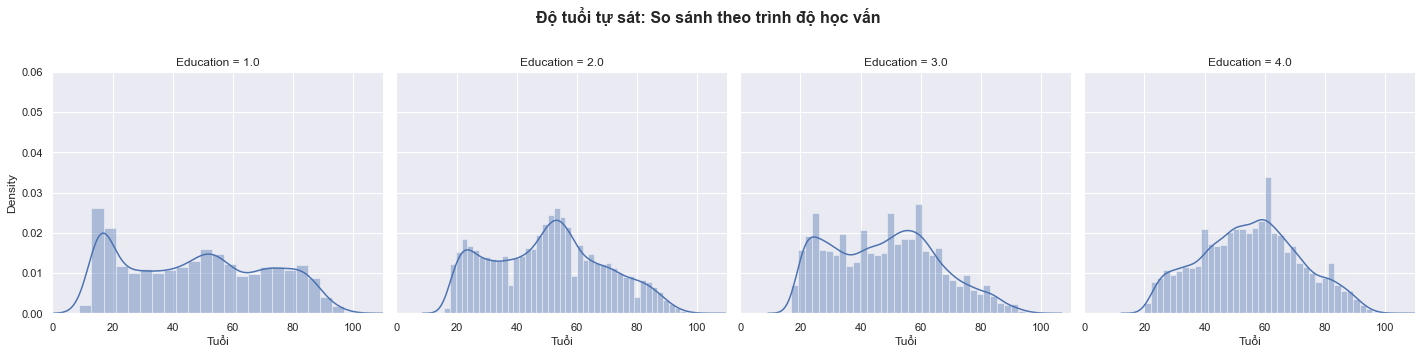

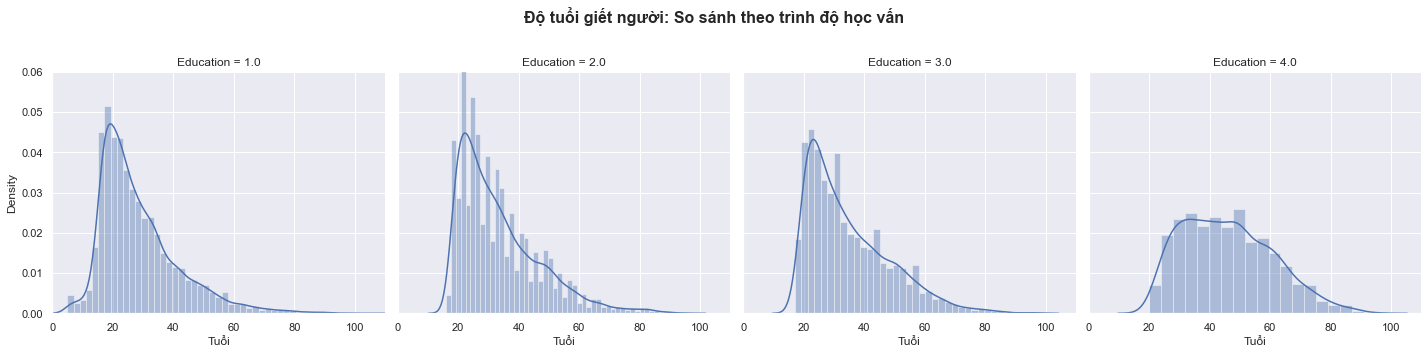

In [12]:
#Biểu đồ thể hiện độ tuổi tự sát và giết người được so sánh theo các trình độ học vấn
g = sns.FacetGrid(suicide[suicide.Education > 0], col='Education',size = 5)
g.map(sns.distplot, 'Age')
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.06), xlabel='Tuổi')
g.fig.suptitle('Độ tuổi tự sát: So sánh theo trình độ học vấn', fontsize=16, fontweight='bold')

g = sns.FacetGrid(homicide[homicide.Education > 0], col='Education',size = 5) 
g.map(sns.distplot, 'Age')
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.06), xlabel='Tuổi')
g.fig.suptitle('Độ tuổi giết người: So sánh theo trình độ học vấn', fontsize=16, fontweight='bold')

Nhận xét : 
```
{
Các peak của độ tuổi giết người đều nằm ở khoảng 20-25 tuổi. Và cũng xảy ra tương tự ở những người tự tử có trình độ học vấn thấp.
Trình độ học vấn từ 3.0 đến 4.0 thì peak độ tuổi tự sát nằm vào khoảng 60 tuổi. Tuổi có thể dùng để dự đoán hành vi.
}
```

`Biểu đồ phân phối độ tuổi tự sát và giết người`

(0.0, 110.0)

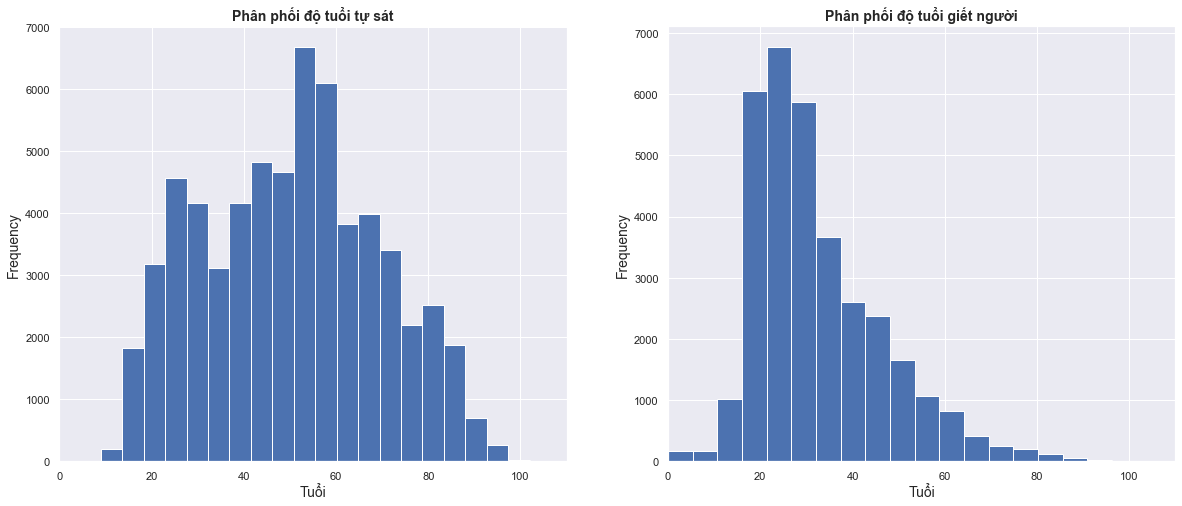

In [13]:
#Biểu đồ phân phối độ tuổi tự sát và giết người
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(suicide.Age, 20)
ax1.set_title('Phân phối độ tuổi tự sát', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tuổi', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_xlim(xmin=0, xmax=110)

ax2.hist(homicide.Age, 20)
ax2.set_title('Phân phối độ tuổi giết người', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tuổi', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.set_xlim(xmin=0, xmax=110)

`Biểu đồ thể hiện mật độ độ tuổi tự sát, giết người và tai nạn`


Text(0.5, 1.0, 'Biểu đồ thể hiện mật độ độ tuổi tự sát, giết người và tai nạn')

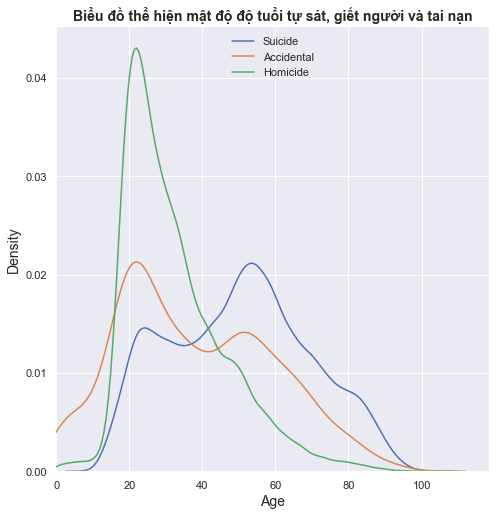

In [14]:
#Biểu đồ thể hiện mật độ độ tuổi tự sát, giết người và tai nạn
sns.FacetGrid(guns, hue='Intent', size=7).map(sns.kdeplot, 'Age')
plt.legend(loc=9, frameon=False)
plt.xlim(xmin=0)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
sns.despine(left=True)
plt.title('Biểu đồ thể hiện mật độ độ tuổi tự sát, giết người và tai nạn', fontsize=14, fontweight='bold')

Nhận xét : 
```
{
Hầu hết các ca giết người đều xảy ra vào độ tuổi 20-30 tuổi. Trong khi các ca tử vong lại nằm ở độ tuổi từ 45 - 60 tuổi.
}
```

`Biểu đồ thể hiện độ tuổi tự sát và giết người được phân loại qua giới tính`

Text(0.5, 0.98, 'Độ tuổi giết người : So sánh theo giới tính')

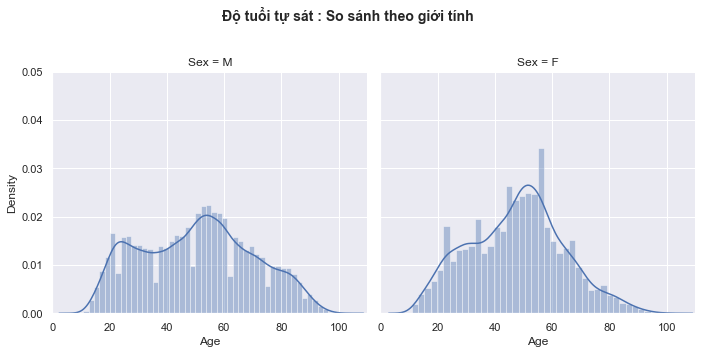

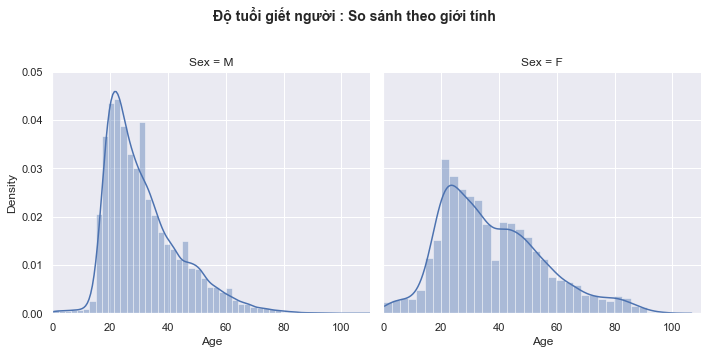

In [15]:
# Biểu đồ thể hiện độ tuổi tự sát và giết người được so sánh theo giới tính
g = sns.FacetGrid(suicide, col='Sex',size=5) 
g.map(sns.distplot, 'Age')
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.05), xlabel='Age')
g.fig.suptitle('Độ tuổi tự sát : So sánh theo giới tính', fontsize=14, fontweight='bold')

g = sns.FacetGrid(homicide, col='Sex',size=5) 
g.map(sns.distplot, 'Age')
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.05), xlabel='Age')
g.fig.suptitle('Độ tuổi giết người : So sánh theo giới tính', fontsize=14, fontweight='bold')

Nhận xét : 
```
{
Hầu hết các ca giết người đều xảy ra vào độ tuổi 20-30 tuổi (chủ yếu xảy ra ở nam giới nhiều hơn). Trong khi các ca tử vong lại nằm ở độ tuổi từ 45 - 60 tuổi (chủ yếu nằm ở nữ giới). Nam giới ở độ tuổi 20-25 có xu hướng tự tử cao hơn so với nữ giới
}
```

`Biểu đồ thể hiện phân phối thay đổi dựa trên độ tuổi và hành vi được phân loại theo giới tính`

Text(0.5, 1.0, 'Biểu đồ thể hiện phân phối thay đổi dựa trên độ tuổi và hành vi được phân loại theo giới tính')

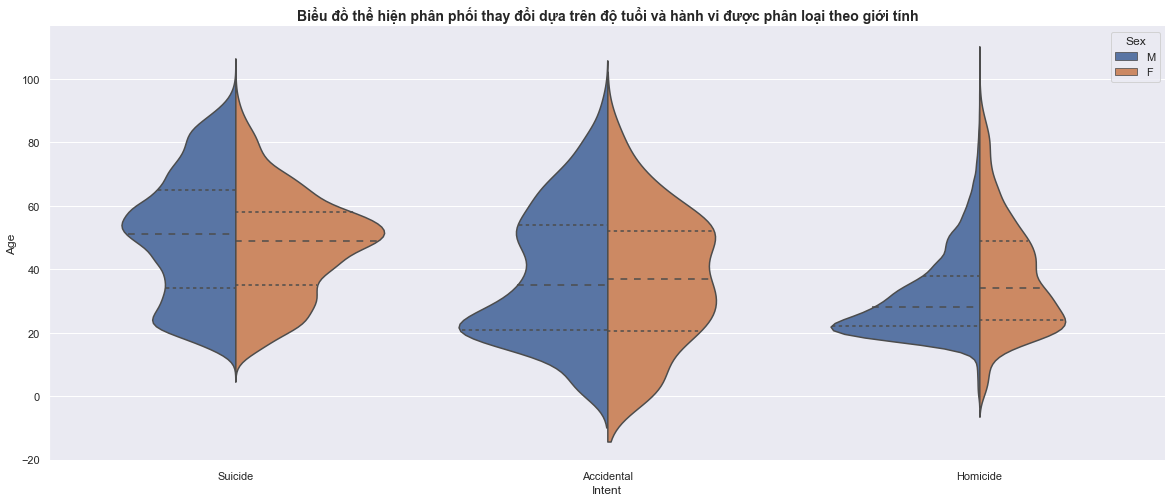

In [16]:
#Biểu đồ thể hiện phân phối thay đổi dựa trên độ tuổi và hành vi được phân loại theo giới tính
sns.set(rc={"figure.figsize":(20, 8)})
sns.violinplot(x='Intent', y='Age', hue='Sex', split=True, data=guns, size=4, inner='quart')
sns.despine(bottom=True)
plt.title('Biểu đồ thể hiện phân phối thay đổi dựa trên độ tuổi và hành vi được phân loại theo giới tính', fontsize=14, fontweight='bold')

Nhận xét : 
```
{
Cột Accidental không cung cấp nhiều thông tin vì sự phân bố và tứ phân vị rất giống nhau giữa các giới tính.

Cột Homicide sự phân bố giữa nam và nữ trong các vụ giết người khác nhau ở tứ phân vị và các khoảng độ tuổi. 

Kết hợp tuổi và giới tính có thể là một dự đoán tốt.
}
```

## Nhận xét tổng thể : 


Tuổi, học vấn, địa điểm hoặc tuổi kết hợp giới tính có thể dùng trong việc dự đoán ý định.

Có thể kết hợp với những dataset khác để tạo 1 ứng dụng dự đoán nơi xảy ra các vụ giết người.